通过对图像的预处理，可以避免模型受到无关因素的影响。在大部分图像识别中，通过对图像的预处理可以提高模型的准确率。<br/>
## TensorFlow图像处理函数
### 图像编码处理
一张RGB色彩模式的图像可以看成一个三维矩阵，矩阵每个数字代表图像上不同位置，不同颜色的亮度。然而图像在存储时并不是直接记录这些矩阵中的数字，而是记录压缩编码后的结果。所以要将一张图像还原成一个三维矩阵，需要解码的过程。TensorFlow提供对jpeg和png格式图像的解码/编码函数。<br/>
以下对图像进行解码和编码：<br/>

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]


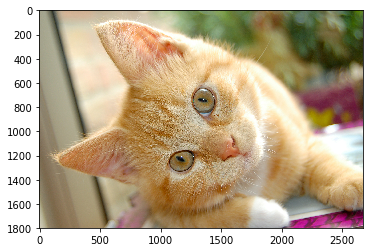

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 读取图像原始数据
image_raw_data = tf.gfile.FastGFile("./picture/cat.jpg", 'rb').read()
with tf.Session() as sess:
    # 对图像jpeg进行解码得到对应三维矩阵。
    # TF还提供tf.image.decode_png函数对png图像进行解码。
    # 解码结果为一个tensor。
    image_data = tf.image.decode_jpeg(image_raw_data)
    print(image_data.eval())
    
    # pyplot可视化图像
    plt.imshow(image_data.eval())
    plt.show()
    
    # 将表示一张图像的三维矩阵重新按照jpeg的格式编码并存入文件中。
    encoded_image = tf.image.encode_jpeg(image_data)
    with tf.gfile.GFile('./out/cat_out.jpg', 'wb') as f:
        f.write(encoded_image.eval())

### 图像大小调整
一般对于从网络上获取的图像大小是不固定的，但是神经网络的输入节点是固定的。因此需要在将图像的像素作为神经网络输入之前，先将图像大小统一。一般调整图像大小的方式有两种，一种是通过算法使得新的图像尽量保留原始图像的信息；一种是按比例调整图像的大小。<br/>
#### 算法方式
通过算法的方式TensorFlow提供了四种方法，并且封装在`tf.images.resize_images`函数，该函数通过`method`参数的取值来控制使用的算法类型。<br/>

| Method取值 | 图像大小调整算法 |
| --------   | -----:  |
| 0     | 双线性插值法(Bilinear interpolation) |
| 1     | 最近邻法(Nearest neighbor interpolation) |
| 2     | 双三次插值法(Bicubic interpolation) |
| 3     | 面积插值法(Area interpolation) |


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


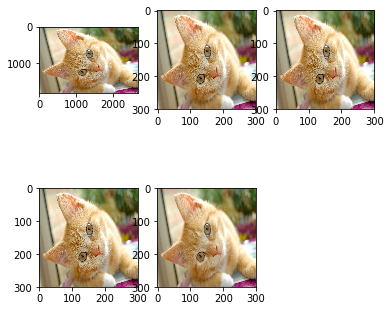

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

image_raw_data = tf.gfile.FastGFile('./picture/cat.jpg', 'rb').read()

with tf.Session() as sess:
    image_data = tf.image.decode_jpeg(image_raw_data)
    # 将图片数据转换为实数类型。
    # 将0-255的像素值转化为0.0-1.0范围内的实数。
    # 大多数图像处理API支持整数和实数输入。如果输入的是整数类型，这些API会在内部
    # 将输入转化为实数后处理，在将输出转为整数。如果有多个处理步骤，则在整数和实数
    # 之间反复转换将导致精度损失。因此推荐在图像处理之前将其转换为实数类型。
    image_data = tf.image.convert_image_dtype(image_data, dtype=tf.float32)
    # 第一个参数是原始图像，第二个参数是转换后图像大小，第三个参数method算法类型
    # 注意，如果输入数据是utf8的格式，那么输出是0~255之内的实数，不方便后续处理
    # 建议图像处理之前先转换为实数类型
    plt.figure(figsize=(6,6)) 
    resized = tf.image.resize_images(image_data, [300, 300], method=0)
    plt.subplot(231)
    plt.imshow(image_data.eval())
    plt.subplot(232)
    plt.imshow(resized.eval())
    plt.subplot(233)
    resized = tf.image.resize_images(image_data, [300, 300], method=1)
    plt.imshow(resized.eval())
    plt.subplot(234)
    resized = tf.image.resize_images(image_data, [300, 300], method=2)
    plt.imshow(resized.eval())
    plt.subplot(235)
    resized = tf.image.resize_images(image_data, [300, 300], method=3)
    plt.imshow(resized.eval())
    plt.show()

不同算法调整出来的结果可能忽悠细微差别，但不会相差太远。除了将整张图像的信息完全保留，TensorFlow还提供API对图像进行裁剪或填充。<br/>
#### 裁剪、填充方式
TensorFlow可以通过`tf.image.resize_image_with_crop_or_pad`函数来调整图像大小。

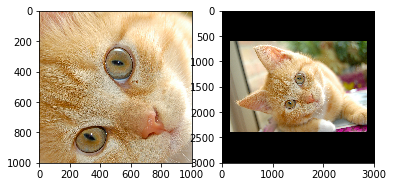

In [24]:
with tf.Session() as sess:
    # 第一个参数是原始图像，后两个参数是调整后目标图像大小；
    # 如果目标图像大小小于原始图像大小，则自动截取原始图像居中部位；
    # 如果目标图像大小大于原始图像大小，则自动在原始图像四周填充全为0的背景。
    croped = tf.image.resize_image_with_crop_or_pad(image_data, 1000, 1000)
    plt.subplot(121)
    plt.imshow(croped.eval())
    
    padded = tf.image.resize_image_with_crop_or_pad(image_data, 3000, 3000)
    plt.subplot(122)
    plt.imshow(padded.eval())
    plt.show()

#### 比例方式
TensorFlow还支持通过比例调整图像大小，通过`tf.image.central_crop`函数来进行比例裁剪图像。

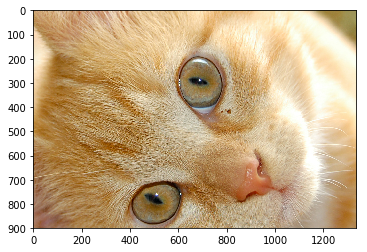

In [25]:
with tf.Session() as sess:
    # 第一个参数为原始图像，第二个参数为调整比例，为(0,1]之间的实数
    central_crop = tf.image.central_crop(image_data, 0.5)
    plt.imshow(central_crop.eval())
    plt.show()

TensorFlow也提供了`tf.image.crop_to_bounding_box`函数和`tf.image.pad_to_bounding_box`来裁剪或填充给定区域的图像。这两个函数要求给定的尺寸必须满足一定的要求，否则程序会报错。
### 图像翻转
在很多图像识别问题中，图像的翻转并不会影响识别结果。于是在训练图像识别的神经网络模型时，可以随机地翻转训练图像，这样训练出来的模型可以识别不同角度的实体。虽然这个问题可以通过收集更多的训练数据来解决，但是通过随机翻转训练图像的方式可以在零成本的情况下很大程度的缓解这个问题。所以图像翻转是一种很常见的图像预处理方式。<br/>
TensorFlow提供了一些函数来支持图像的翻转，实现图像的上下翻转、左右翻转以及沿对角线翻转的功能。<br/>

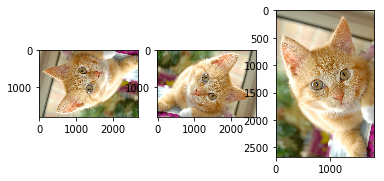

In [28]:
with tf.Session() as sess:
    # 上下翻转
    flipped_up_down = tf.image.flip_up_down(image_data)
    # 左右翻转
    flipped_left_right = tf.image.flip_left_right(image_data)
    # 对角线翻转
    transposed = tf.image.transpose_image(image_data)
    plt.subplot(1,3,1)
    plt.imshow(flipped_up_down.eval())
    plt.subplot(1,3,2)
    plt.imshow(flipped_left_right.eval())
    plt.subplot(1,3,3)
    plt.imshow(transposed.eval())
    plt.show()

TensorFlow还提供了随机图像翻转的API。

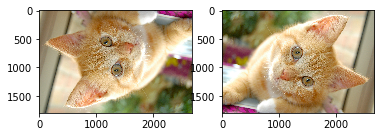

In [29]:
with tf.Session() as sess:
    flipped_up_down = tf.image.random_flip_up_down(image_data)
    flipped_left_right = tf.image.random_flip_left_right(image_data)
    
    plt.subplot(1,2,1)
    plt.imshow(flipped_up_down.eval())
    plt.subplot(1,2,2)
    plt.imshow(flipped_left_right.eval())
    plt.show()

### 图像色彩调整
和图像翻转类似，调整图像的`亮度`、`对比度`、`饱和度`和`色相`在很多图像识别应用中都不会影响识别结果。<br/>
使用TensorFlow的API调整图像的`亮度`。<br/>

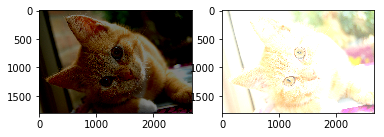

In [30]:
with tf.Session() as sess:
    # 将图像的亮度-0.5
    adjusted = tf.image.adjust_brightness(image_data, -0.5)
    # 色彩调整API可能到像素的实数值超出0.0-1.0的范围，因此在输出最终图像
    # 之前需要将其值截断在0.0-1.0之间，否通图像无法正常可视化。以此为输入的
    # 神经网络的训练质量也可能受到影响。
    # 如果对图像进行多项处理操作，那么这一截断操作应该在所有操作处理完后进行。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,2,1)
    plt.imshow(adjusted.eval())
    # 将图像的亮度+0.5
    adjusted = tf.image.adjust_brightness(image_data, 0.5)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,2,2)
    plt.imshow(adjusted.eval())
    plt.show()

使用TensorFlow的API调整图像的`对比度`。

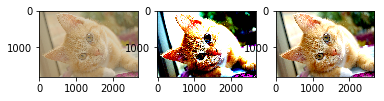

In [37]:
with tf.Session() as sess:
    # 图像对比度减少0.5倍
    adjusted = tf.image.adjust_contrast(image_data, 0.5)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,1)
    plt.imshow(adjusted.eval())
    # 图像对比度增加5倍
    adjusted = tf.image.adjust_contrast(image_data, 5.0)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,2)
    plt.imshow(adjusted.eval())
    # 在第二个参数和第三个参数之间随机调整对比对，参数值为非负数
    adjusted = tf.image.random_contrast(image_data, 0.0, 5.0)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,3)
    plt.imshow(adjusted.eval())
    plt.show()

使用TensorFlow的API调整图像的`色相`。

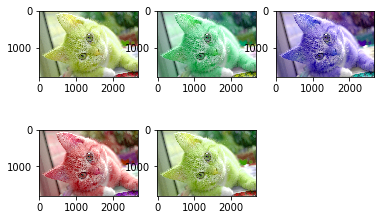

In [39]:
with tf.Session() as sess:
    adjusted = tf.image.adjust_hue(image_data, 0.1)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(2,3,1)
    plt.imshow(adjusted.eval())
    
    adjusted = tf.image.adjust_hue(image_data, 0.3)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(2,3,2)
    plt.imshow(adjusted.eval())
    
    adjusted = tf.image.adjust_hue(image_data, 0.6)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(2,3,3)
    plt.imshow(adjusted.eval())
    
    adjusted = tf.image.adjust_hue(image_data, 0.9)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(2,3,4)
    plt.imshow(adjusted.eval())
    # 在[-max_delta, max_delta]的范围内随机调整图像的色相
    # max_delta取值范围[0, 0.5]之间
    adjusted = tf.image.random_hue(image_data, 0.5)
    plt.subplot(2,3,5)
    plt.imshow(adjusted.eval())
    
    plt.show()

使用TensorFlow的API调整图像`饱和度`。

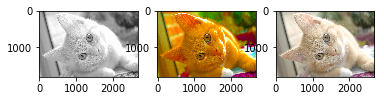

In [42]:
with tf.Session() as sess:
    # 将图像饱和度-5
    adjusted = tf.image.adjust_saturation(image_data, -5)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,1)
    plt.imshow(adjusted.eval())
    # 将图像饱和度+5
    adjusted = tf.image.adjust_saturation(image_data, 5)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,2)
    plt.imshow(adjusted.eval())
    # 在第二个参数和第三个参数之间随机调整图像饱和度，参数值为非负数
    adjusted = tf.image.random_saturation(image_data, 0, 5)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.subplot(1,3,3)
    plt.imshow(adjusted.eval())
    
    plt.show()

除了调整图像的亮度、对比度、饱和度和色相，TensorFlow还提供API用于完成图像标准化的过程。这个操作是将图像的三维矩阵中的数字均值变成0，方差变成1。

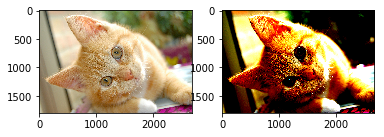

In [44]:
with tf.Session() as sess:
    plt.subplot(1,2,1)
    plt.imshow(image_data.eval())
    
    adjusted = tf.image.per_image_standardization(image_data)
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    
    plt.subplot(1,2,2)
    plt.imshow(adjusted.eval())
    
    plt.show()

#### 处理标注框
在TensorFlow处理图像识别数据集中，图像中需要关注的物体将被标注框圈出来。TensorFlow提供了一些工具用于处理标注框。

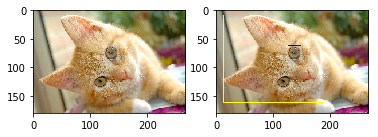

In [53]:
with tf.Session() as sess:
    image_data = tf.image.resize_images(image_data, [180, 267], method=1)
    # tf.image.draw_bounding_boxes的输入是一个batch的数据，也就是多张图像
    # 组成的四维矩阵，所以需要将解码后的图像再加一维
    batched = tf.expand_dims(tf.image.convert_image_dtype(
        image_data, tf.float32), 0)
    # 图像的所有标注框，一个标注框有四个数字，[y_min, x_min, y_max, x_max]
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7],[0.35, 0.47, 0.5, 0.56]]])
    result = tf.image.draw_bounding_boxes(batched, boxes)
    plt.subplot(1,2,1)
    plt.imshow(image_data.eval())
    plt.subplot(1,2,2)
    # result是一个四维矩阵，而imshow只能处理三维矩阵
    # 因此需要从四维矩阵中提取出三维矩阵
    plt.imshow(result[0].eval())
    
    plt.show()

随机截取图像上有信息含量的部分也是提高模型健壮性的一种方式。这样可以使得训练得到的模型不受物体大小的影响。<br/>
以下为TensorFlow的`tf.image.sample_distorted_bounding_box`函数的使用。

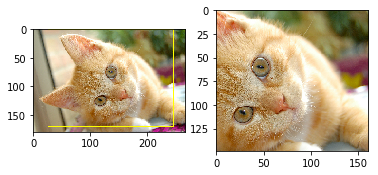

In [60]:
with tf.Session() as sess:
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7],[0.35, 0.47, 0.5, 0.56]]])
    # tf.shape(image_data)输出维度矩阵，例如image_data为78*78*3大小，
    # 则输出[78, 78, 3]
    # min_object_covered 随机截取至少包含某个标准框40%信息
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_data), bounding_boxes = boxes, 
        min_object_covered=0.4)
    batched = tf.expand_dims(tf.image.convert_image_dtype(image_data, 
                                                   tf.float32), 0)
    image_with_box = tf.image.draw_bounding_boxes(batched, bbox_for_draw)
    distorted_image = tf.slice(image_data, begin, size)
    
    plt.subplot(1,2,1)
    plt.imshow(image_with_box[0].eval())
    plt.subplot(1,2,2)
    plt.imshow(distorted_image.eval())
    
    plt.show()

## 图像预处理完整样例
以下TensorFlow完成从图像片段截取，到图像大小调整再到图像翻转再到色彩调整的整个图像预处理过程。

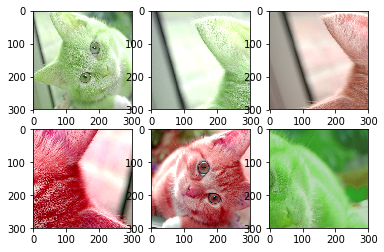

In [63]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# 给定一张图像随机调整图像色彩。通过随机色彩调整顺序，
# 可以进一步降低图像无关因素对模型训练的影响
def distort_color(image, coloring_ordering=0):
    if coloring_ordering == 0:
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    elif coloring_ordering == 1:
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    
    return tf.clip_by_value(image, 0.0, 1.0)

def preprocess_for_train(image, height, width, bbox):
    # 如果没有标注框，则认为整个图像是需要关注的部分
    if bbox is None:
        bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, 
                           shape=[1,1,4])
    # 转换图像张量的类型
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # 随机截取图像，减小需要关注的图像大小对图像识别算法的影响
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(
        tf.shape(image), bounding_boxes = bbox)
    distorted_image = tf.slice(image, bbox_begin, bbox_size)
    # 随机截取的图像调整为神经网络输入的大小。调整算法随机生成
    distorted_image = tf.image.resize_images(
        distorted_image, [height, width], method=np.random.randint(4))
    # 随机左右翻转图片
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    # 随机使用一种色彩调整顺序
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    
    return distorted_image

image_raw_data = tf.gfile.FastGFile('./picture/cat.jpg', 'rb').read()
with tf.Session() as sess:
    image = tf.image.decode_jpeg(image_raw_data)
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7],[0.35, 0.47, 0.5, 0.56]]])
    
    for i in range(6):
        plt.subplot(2,3,i+1)
        result = preprocess_for_train(image, 299, 299, boxes)
        plt.imshow(result.eval())
    
    plt.show()